### Assignment 2

## Gradient Descent with cost_function customized for Problem 1
The goal is to find w ∈Rd so as to minimize the objective:
L(w) = ∑(xi,yi,w), where `(xi,yi,w) := log(1 + e−yi〈xi,w〉).

In [414]:
#Helper functions
import numpy as np
import matplotlib.pyplot as plt
import random
import time

def cost_function(x,y,w):
    cost = np.sum(np.log(1 + np.exp(-1*x*y*w)))
    return cost
 
def gradient_descent(x, y, iterations = 100, learning_rate = 0.0001,
                     print_iterations=False):
     
    current_weight = -1
    iterations = iterations
    learning_rate = learning_rate
    costs = []
    weights = []
     
    for i in range(iterations):
        current_cost = cost_function(x, y, current_weight)
        costs.append(current_cost)
        weights.append(current_weight)
        weight_derivative = np.sum((-1 * x * y) * np.exp(-1 * x * y * current_weight) 
                                   /(1 + np.exp(-1 * x * y * current_weight)) )
        current_weight = current_weight - (learning_rate * weight_derivative)
        if (print_iterations):
            print(f"Iteration {i+1}: Cost {current_cost}, Weight \
            {current_weight},")
     
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
#     plt.savefig("Costweight.png")
     
    return current_weight


def gradient(current_weight, A, b, step_size, steps):
    for i in range(steps):
        weight_derivative = 2*np.dot(np.transpose(A), (np.subtract(Ax, b)))
        current_weight += -step_size * weight_derivative
    print("Function Value is",np.sum(current_weight))
    return current_weight


def get_data():
    N = 500
    M = 1000
    A = np.random.uniform(-1,1,(M,N))
    X = np.random.uniform(-1,1,(N,1))
    AX = np.dot(A,X)
    n = np.random.normal(loc=0, scale =0.5, size=1000).reshape(M,1)
    return A,X,n

def gradient_method(A,X,n):
    t1 = time.time()
    AX = np.dot(A,X)
    b = AX + n
    x0 = [0]*len(X)
    step_size = 0.1
    steps = 50
    distance = np.linalg.norm(X - gradient(x0, A, b, step_size, steps))
    print("Total Distance for gradient method:",distance)
    t2 = time.time()
    print("Time for gradient method",t2-t1)
    return t2-t1

def numerical_method(A,X,n):
    t1 = time.time()
    step_size = 0.1
    steps = 50
    AX = np.dot(A,X)
    b = AX + n
    val = np.linalg.inv(np.dot(A.transpose(),A))
    val = np.dot(val,A.transpose())
    x = np.dot(val,b)
#     print(x_star.shape)
    distance = np.linalg.norm(X - x)
    print("Total Distance for numerical method:",distance)
    t2 = time.time()
    print("Time for numerical method",t2-t1)
    return t2-t1

def grad(x,var):
    val =0
    for i in range(200):
        val+=(x-var)
    return val/200
  
def learning(method,i):
    if method =='constant':
        return 0.1
    elif method == 'inverse':
        return 0.1/(i+1)
    elif method =='root':
        return 0.1/math.sqrt(i+1)
    
def s_grad(x,y,method):
    for i in range(1,201):
        a = i/200 if i<=100 else (i-100)/200
        b = -1 if i<=100 else 1
        x-= learning(method,i)*grad(x,a)
        y-= learning(method,i)*grad(y,b)
        return y

### 1.C - Well separable
#### Note: set print_iterations to True to see the logs for all iterations

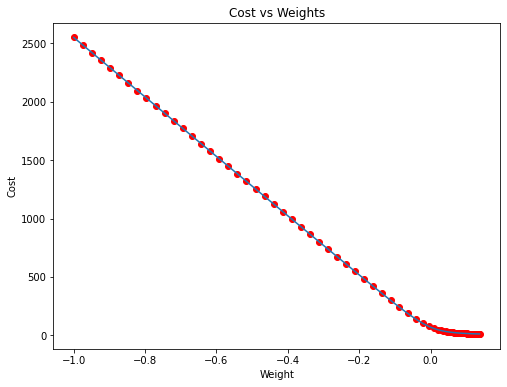

The Final weight is: 0.13814692128425568


In [382]:
import math
x = [i for i in range(-50,51) ]
x.remove(0)
x = np.array(x)
y = [math.copysign(1,i) for i in range(-50,50)]
y = np.array(y)
final_weight = gradient_descent(x,y,iterations = 100,learning_rate=0.00001, print_iterations = False)
print("The Final weight is:",final_weight)

### 1.D - Well separable with 10% corruption
#### Note: set print_iterations to True to see the logs for all iterations

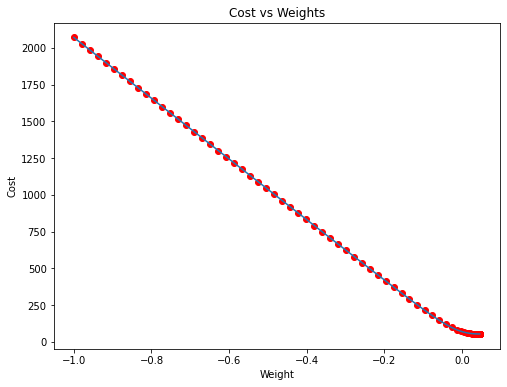

The Final weight is: 0.04606552537638559


In [383]:
import math
x = [i for i in range(-50,51) ]
x.remove(0)
x = np.array(x)
y = [-1 * math.copysign(1,i) if (i<-45 or i>44) else math.copysign(1,i) for i in range(-50,50)]
y = np.array(y)
final_weight = gradient_descent(x,y,iterations = 100,learning_rate=0.00001, print_iterations = False)
print("The Final weight is:",final_weight)

### 3.C - Generate Data

In [393]:
A,X,n = get_data()
print("Shape of A(range of values [-1,1]):" , A.shape)
print("Shape of X*(range of values [-1,1]):" , X.shape)
print("Shape of n is shape of AX:" , n.shape)

Shape of A(range of values [-1,1]): (1000, 500)
Shape of X*(range of values [-1,1]): (500, 1)
Shape of n is shape of AX: (1000, 1)


### 3.D - Gradient Method

In [394]:
print("Step size = 1/10 and steps = 50")
time_grad = gradient_method(A,X,n)

Step size = 1/10 and steps = 50
Function Value is -976487.9095806517
Total Distance for gradient method: 1417672.9509089072
Time for gradient method 0.03608393669128418


### 3.E - Numerical Method

In [395]:
time_numerical = numerical_method(A,X,n)
print("Difference in time is:",abs(time_numerical-time_grad))
print("Ratio of time of numerical to gradient is:",time_numerical/time_grad)

Total Distance for numerical method: 0.8830245762884811
Time for numerical method 0.03486299514770508
Difference in time is: 0.0012209415435791016
Ratio of time of numerical to gradient is: 0.9661638486392198


### On various runs, gradient method is taking more time this is because internal libraries are optimised and gradient method has randomness associated with it.

### 4.C - SGD

In [419]:
print("Value of y after 200 steps:",s_grad(1,1,'constant'))

Value of y after 200 steps: 0.8


In [420]:
print("Value of y after 200 steps:",s_grad(1,1,'inverse'))

Value of y after 200 steps: 0.9


In [421]:
print("Value of y after 200 steps:",s_grad(1,1,'root'))

Value of y after 200 steps: 0.8585786437626906
